In [1]:
!pip install sidetable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go

import datetime as dt
warnings.filterwarnings('ignore')

In [3]:
data_covid = pd.read_excel('C:\\Users\\ainaa\\Desktop\\Data untuk Analisis Korelasi.xlsx')
data_covid

,Tarikh,Suhu (Celcius),Range Suhu (Celcius),Suhu 23-26,Suhu 26-29,Suhu 29-32,Kelembapan (%),Range Kelembapan (%),Kelembapan 58-71,Kelembapan 71-84,Kelembapan 84-97,Kelajuan Angin (km/j),Range Kelajuan Angin (km/j),Kelajuan Angin 1-5,Kelajuan Angin 5-9,Kelajuan Angin 9-13,Bil,Nama Pesakit,No Pengenalan/No Dokumen Perjalanan Pesakit,Umur (Tahun),Kumpulan Umur (Tahun),Alamat semasa/kejadian,Mukim / Zon,Jantina,Warganegara,Keturunan,Status Pesakit,Lab Test Status Pertama,Kategori Gejala,Simptom,1-demam,2-batuk,3-selesema,4-asimptomatik,5-sakit tekak,6-hilang deria bau,7-hilang deria rasa,8-sakit kepala,9-sakit badan,10-cirit-birit,11-pening,12-sesak nafas,13-muntah,14-keletihan,15-sakit sendi,16-hidung tersumbat,17-sakit dada,18-berkahak,19-hilang selera makan,20-menggigil,21-sakit perut,22-mual,23-sakit otot,24-sakit mata,25-lain-lain,Catatan,Komorbiditi,satu,dua,tiga,empat,lima,enam
0,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,1,CHEONG KEE ANN,640425108291,57,50--59,"1, JALAN DAMAI PERDANA 9 /2J BANDAR DAMAI PERD...",Ampang,Lelaki,Warganegara,Cina,Hidup,Positif,CAT 2,demam,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,darah tinggi,darah tinggi,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,2,MD YUNUS BIN MD DOM,510502055301,70,70--79,"10 JALAN INANG 19/9 BANDAR MAHKOTA Cheras, BT ...",Cheras,Lelaki,Warganegara,Melayu,Hidup,Positif,CAT 2,batuk,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,"darah tinggi, kencing manis",darah tinggi,kencing manis,NaN,NaN,NaN,NaN
2,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,3,MOHAMAD FIRDAUS BIN SHUDIN,860326335645,35,30--39,"1-09, BLOK KENARI B, TAMAN IMPIAN EHSAN 43300 ...",Cheras,Lelaki,Warganegara,Melayu,Hidup,Positif,CAT 1,tiada,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,tiada,tiada,NaN,NaN,NaN,NaN,NaN
3,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,4,NUR ADELIA ALISHA BINTI MUHAMMAD RUSYDI,200826140808,1,0--4,"11, JALAN WATAN 19 TAMAN SRI WATAN Ampang",Ampang,Perempuan,Warganegara,Melayu,Hidup,Positif,CAT 2,demam,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,tiada,tiada,NaN,NaN,NaN,NaN,NaN
4,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,5,LOW CHON LIAN,630120107184,58,50--59,12 JALAN 5 TAMAN DAMAI JAYA BATU 9/12 Cheras 4...,Cheras,Perempuan,Warganegara,Cina,Hidup,Positif,CAT 2,"batuk, hilang deria bau",Tidak,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,tiada,tiada,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,2022-01-31,25.429,23--26,Ya,Tidak,Tidak,90.714,84--97,Tidak,Tidak,Ya,2.143,1--5,Ya,Tidak,Tidak,388,NOOR AZRIN BINTI MD ANUAR,840122145294,38,30--39,"""B-2-9 D’PINES CONDOMINIUM\n TAMAN NIRWANA\n A...",Ampang,Perempuan,Warganegara,Melayu,Hidup,Positif,CAT 1,tiada,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,tiada,tiada,NaN,NaN,NaN,NaN,NaN
25451,2022-01-31,25.429,23--26,Ya,Tidak,Tidak,90.714,84--97,Tidak,Tidak,Ya,2.143,1--5,Ya,Tidak,Tidak,390,ABDUL GUTHOOS BIN P.D ABDUL WAHAB,56

In [4]:
# Check for empty values
data_covid.isnull().sum()

Tarikh                      0
Suhu (Celcius)              0
Range Suhu (Celcius)        0
Suhu 23-26                  0
Suhu 26-29                  0
                        ...  
dua                     24368
tiga                    25216
empat                   25410
lima                    25450
enam                    25454
Length: 63, dtype: int64

In [5]:
data_covid.dtypes

Tarikh                  datetime64[ns]
Suhu (Celcius)                 float64
Range Suhu (Celcius)            object
Suhu 23-26                      object
Suhu 26-29                      object
                             ...      
dua                             object
tiga                            object
empat                           object
lima                            object
enam                            object
Length: 63, dtype: object

In [6]:
data_covid['25-lain-lain'].value_counts()

Tidak    25417
Ya          38
Name: 25-lain-lain, dtype: int64

<AxesSubplot:xlabel='Tarikh', ylabel='count'>

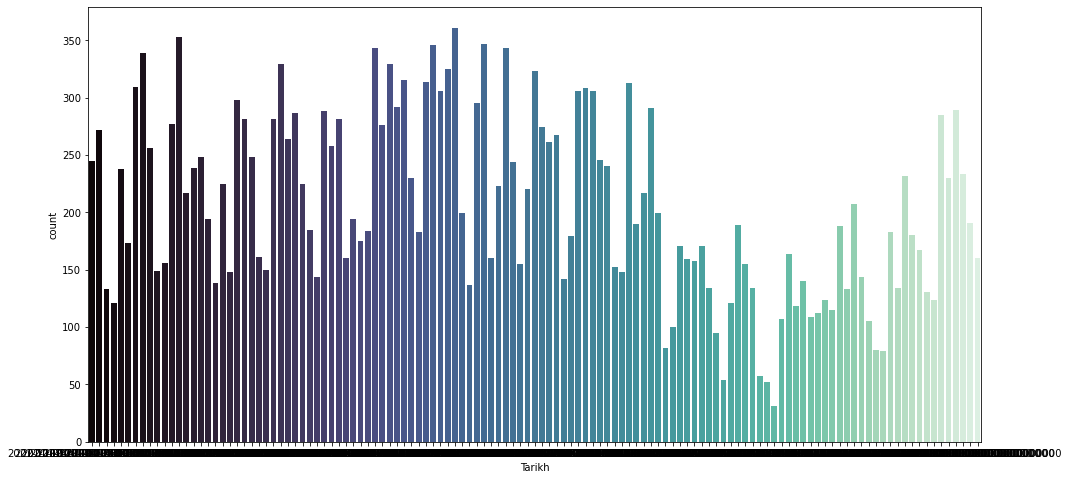

In [7]:
#Visualising the number of Covid-19 cases
fig = plt.figure(figsize=(16,8))
sns.countplot(x='Tarikh', data=data_covid, palette='mako')

#### Visualise original data

In [8]:
#Plot graph for temperature and simptom
#plt.figure(figsize = (16, 8))
#sns.barplot(data = data_covid, x = 'Kelembapan (%)', y = 'Simptom', palette = 'magma')
#plt.xticks(rotation = 90)

#### Build new data for correlation purpose

In [9]:
# Simptom by day
covid_new = data_covid.groupby('Tarikh')[['Suhu 23-26','Suhu 26-29','Suhu 29-32','Kelembapan 58-71','Kelembapan 71-84',
                                          'Kelembapan 84-97','Kelajuan Angin 1-5','Kelajuan Angin 5-9','Kelajuan Angin 9-13',
                                          '1-demam','2-batuk','3-selesema','4-asimptomatik','5-sakit tekak','6-hilang deria bau',
                                          '7-hilang deria rasa','8-sakit kepala','9-sakit badan','10-cirit-birit','11-pening',
                                          '12-sesak nafas','13-muntah','14-keletihan','15-sakit sendi','16-hidung tersumbat',
                                          '17-sakit dada','18-berkahak','19-hilang selera makan','20-menggigil',
                                          '21-sakit perut','22-mual','23-sakit otot','24-sakit mata',
                                          '25-lain-lain']].count().reset_index()
covid_new

,Tarikh,Suhu 23-26,Suhu 26-29,Suhu 29-32,Kelembapan 58-71,Kelembapan 71-84,Kelembapan 84-97,Kelajuan Angin 1-5,Kelajuan Angin 5-9,Kelajuan Angin 9-13,1-demam,2-batuk,3-selesema,4-asimptomatik,5-sakit tekak,6-hilang deria bau,7-hilang deria rasa,8-sakit kepala,9-sakit badan,10-cirit-birit,11-pening,12-sesak nafas,13-muntah,14-keletihan,15-sakit sendi,16-hidung tersumbat,17-sakit dada,18-berkahak,19-hilang selera makan,20-menggigil,21-sakit perut,22-mual,23-sakit otot,24-sakit mata,25-lain-lain
0,2021-10-01,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
1,2021-10-02,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
2,2021-10-03,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133
3,2021-10-04,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
4,2021-10-05,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2022-01-27,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230
119,2022-01-28,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
120,2022-01-29,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233
121,2022-01-30,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191


#### Correlation between variables

<AxesSubplot:>

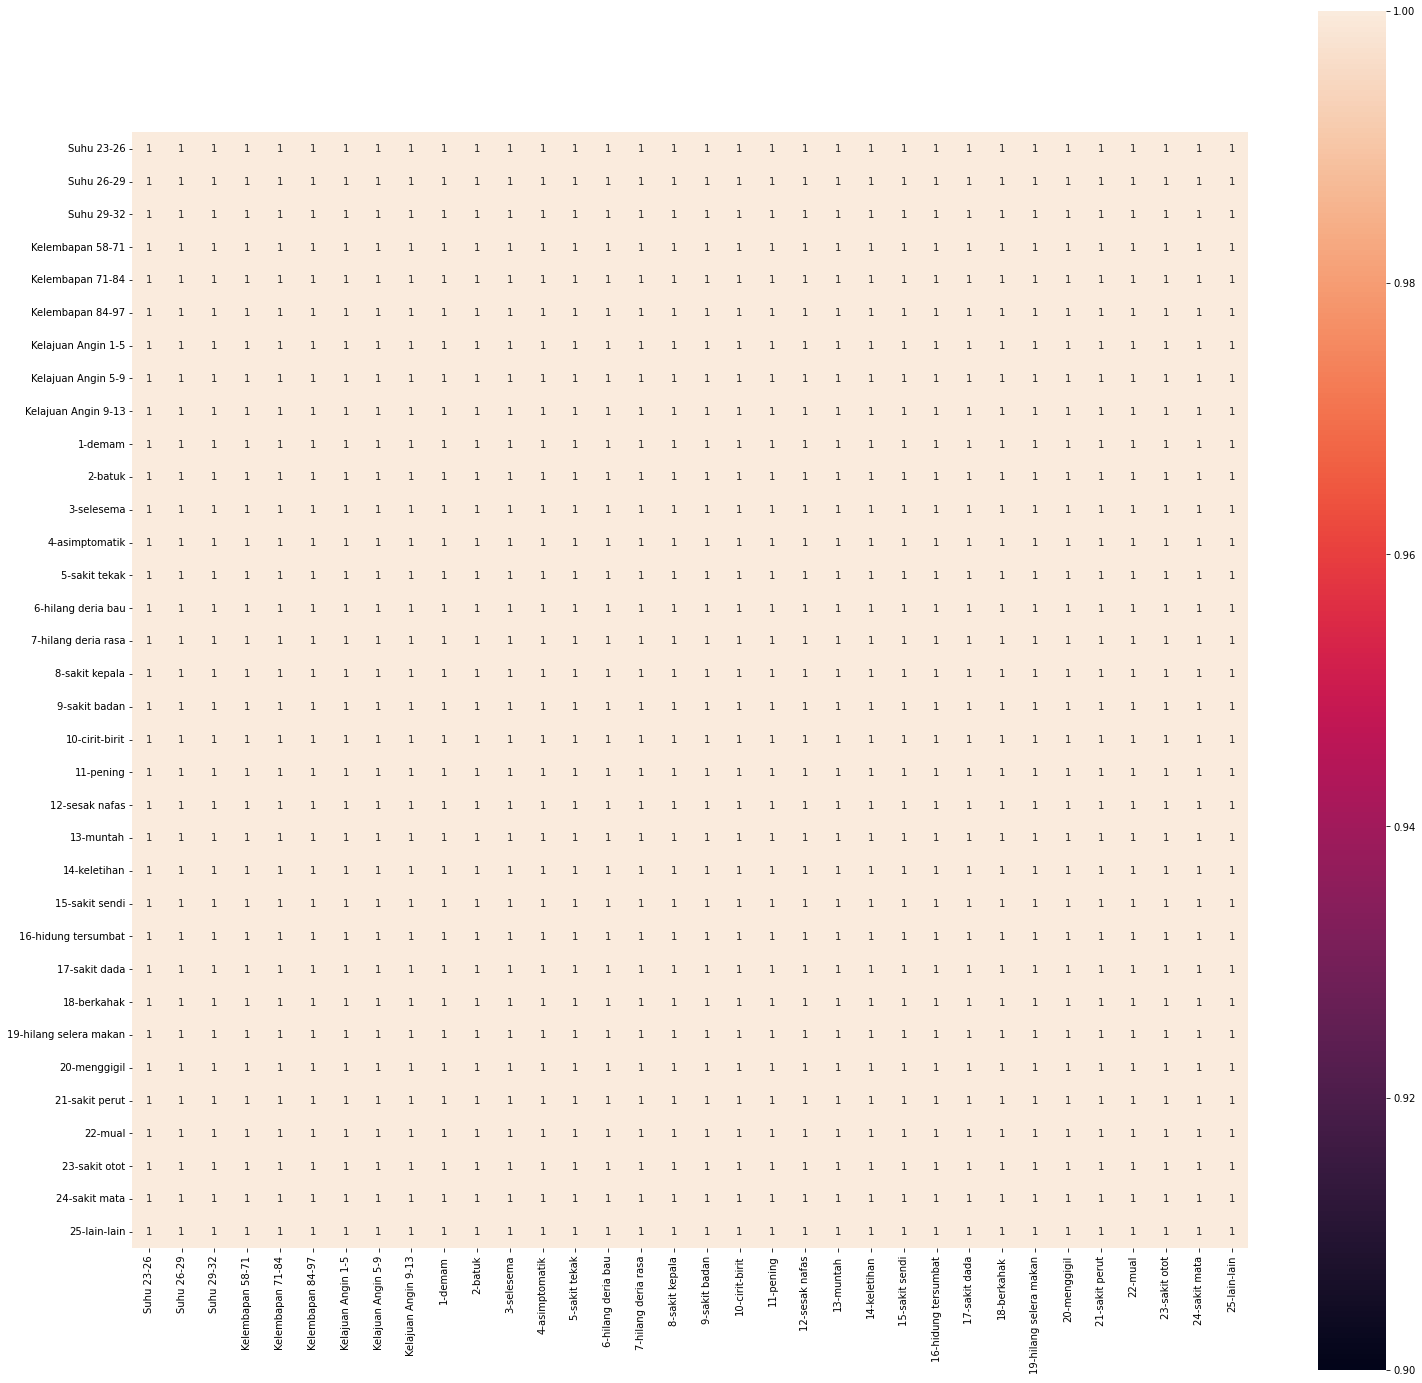

In [10]:
# Let's see some correlation 
corrmat = covid_new.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

#### Correlations between Suhu and other attributes

<AxesSubplot:>

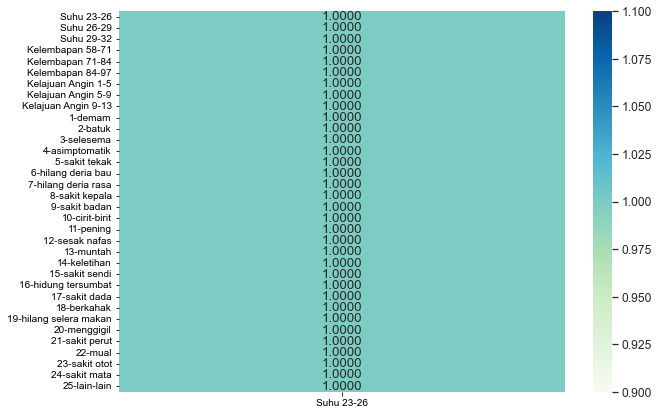

In [11]:
# Find correlations between Suhu rendah and other attributes
corr_suhu = covid_new['Suhu 23-26']
corr_suhu_new = covid_new.corrwith(corr_suhu, axis=0)
corr_suhu_new = pd.DataFrame(corr_suhu_new)
corr_suhu_new.rename (columns = {0: 'Suhu 23-26'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_suhu_new, vmax=1, cmap='GnBu', fmt='.4f', annot=True)

<AxesSubplot:>

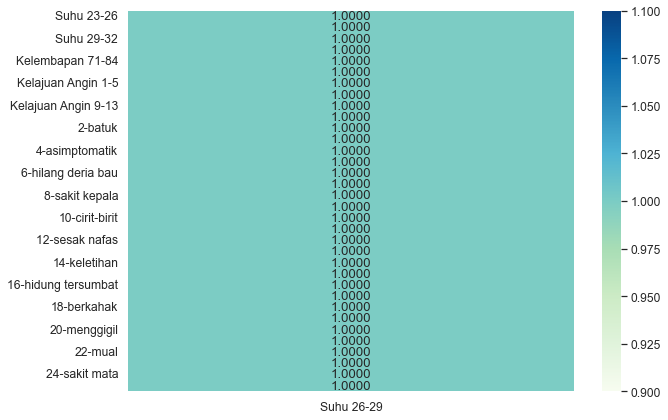

In [12]:
# Find correlations between Suhu sederhana and other attributes
corr_suhu = covid_new['Suhu 26-29']
corr_suhu_new = covid_new.corrwith(corr_suhu, axis=0)
corr_suhu_new = pd.DataFrame(corr_suhu_new)
corr_suhu_new.rename (columns = {0: 'Suhu 26-29'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_suhu_new, vmax=1, cmap='GnBu', fmt='.4f', annot=True)

<AxesSubplot:>

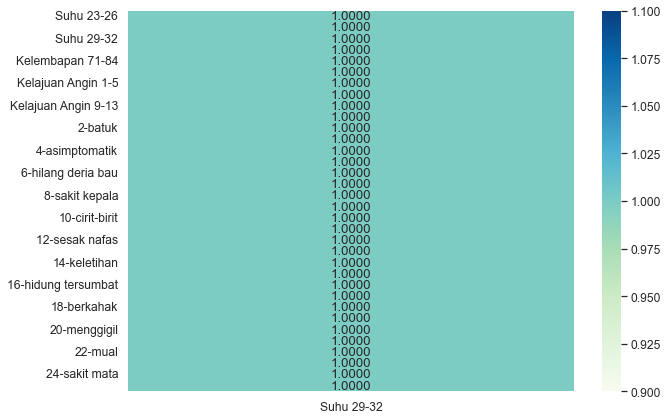

In [13]:
# Find correlations between Suhu tinggi and other attributes
corr_suhu = covid_new['Suhu 29-32']
corr_suhu_new = covid_new.corrwith(corr_suhu, axis=0)
corr_suhu_new = pd.DataFrame(corr_suhu_new)
corr_suhu_new.rename (columns = {0: 'Suhu 29-32'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_suhu_new, vmax=1, cmap='GnBu', fmt='.4f', annot=True)

#### Correlations between Kelembapan and other attributes

<AxesSubplot:>

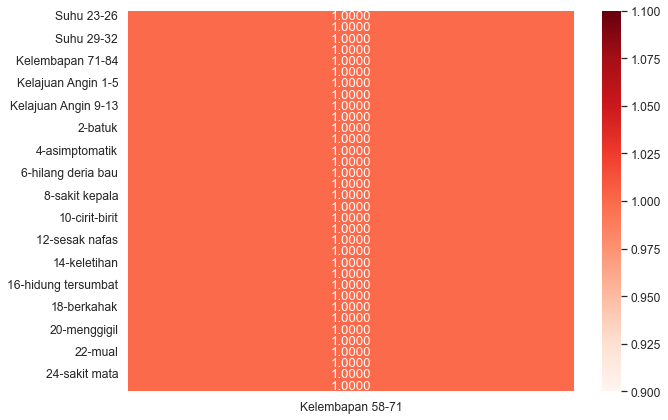

In [14]:
# Find correlations between Kelembapan rendah and other attributes
corr_lembap = covid_new['Kelembapan 58-71']
corr_lembap_new = covid_new.corrwith(corr_lembap, axis=0)
corr_lembap_new = pd.DataFrame(corr_lembap_new)
corr_lembap_new.rename (columns = {0: 'Kelembapan 58-71'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_lembap_new, vmax=1, cmap='Reds', fmt='.4f', annot=True)

<AxesSubplot:>

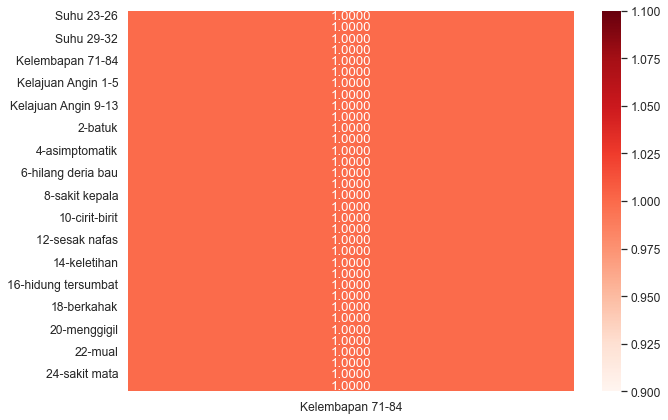

In [15]:
# Find correlations between Kelembapan sederhana and other attributes
corr_lembap = covid_new['Kelembapan 71-84']
corr_lembap_new = covid_new.corrwith(corr_lembap, axis=0)
corr_lembap_new = pd.DataFrame(corr_lembap_new)
corr_lembap_new.rename (columns = {0: 'Kelembapan 71-84'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_lembap_new, vmax=1, cmap='Reds', fmt='.4f', annot=True)

<AxesSubplot:>

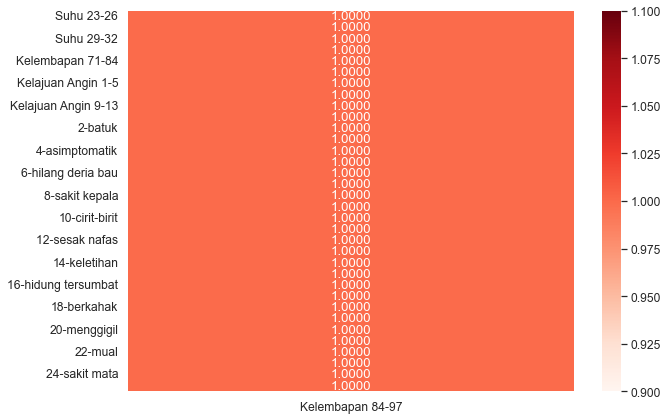

In [16]:
# Find correlations between Kelembapan tinggi and other attributes
corr_lembap = covid_new['Kelembapan 84-97']
corr_lembap_new = covid_new.corrwith(corr_lembap, axis=0)
corr_lembap_new = pd.DataFrame(corr_lembap_new)
corr_lembap_new.rename (columns = {0: 'Kelembapan 84-97'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_lembap_new, vmax=1, cmap='Reds', fmt='.4f', annot=True)

#### Correlations between Kelajuan Angin and other attributes

<AxesSubplot:>

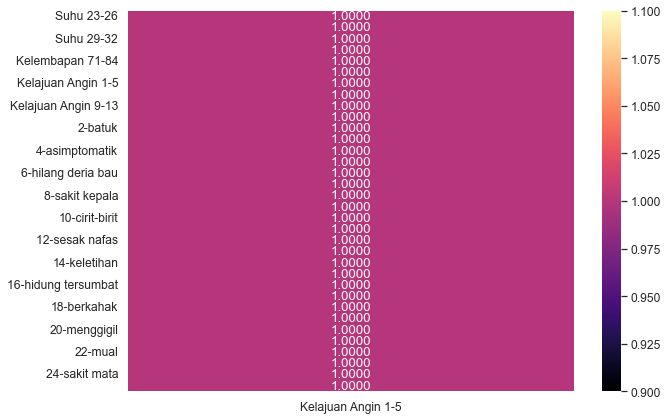

In [17]:
# Find correlations between Kelajuan Angin rendah and other attributes
corr_angin = covid_new['Kelajuan Angin 1-5']
corr_angin_new = covid_new.corrwith(corr_angin, axis=0)
corr_angin_new = pd.DataFrame(corr_angin_new)
corr_angin_new.rename (columns = {0: 'Kelajuan Angin 1-5'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_angin_new, vmax=1, cmap='magma', fmt='.4f', annot=True)

<AxesSubplot:>

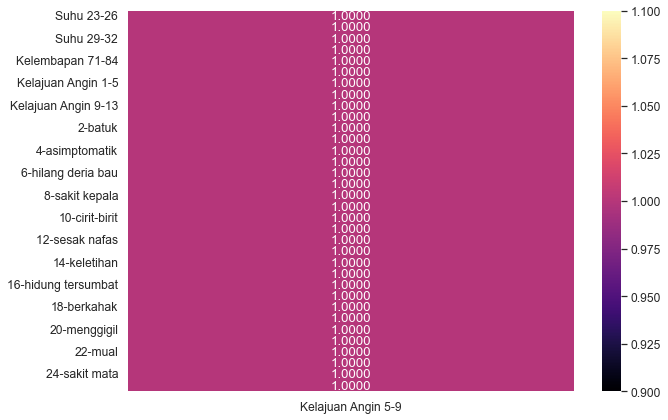

In [18]:
# Find correlations between Kelajuan Angin sederhana and other attributes
corr_angin = covid_new['Kelajuan Angin 5-9']
corr_angin_new = covid_new.corrwith(corr_angin, axis=0)
corr_angin_new = pd.DataFrame(corr_angin_new)
corr_angin_new.rename (columns = {0: 'Kelajuan Angin 5-9'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_angin_new, vmax=1, cmap='magma', fmt='.4f', annot=True)

<AxesSubplot:>

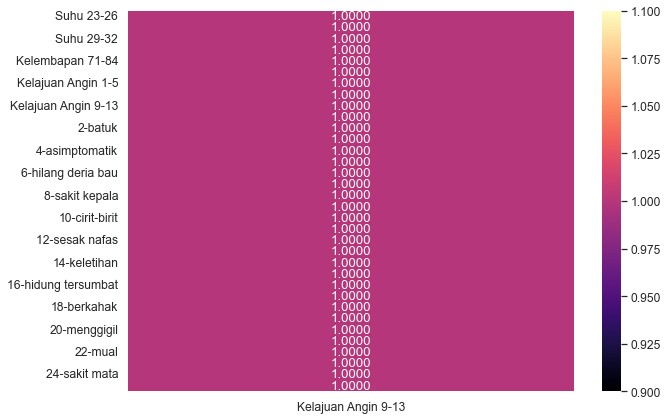

In [19]:
# Find correlations between Kelajuan Angin sederhana and other attributes
corr_angin = covid_new['Kelajuan Angin 9-13']
corr_angin_new = covid_new.corrwith(corr_angin, axis=0)
corr_angin_new = pd.DataFrame(corr_angin_new)
corr_angin_new.rename (columns = {0: 'Kelajuan Angin 9-13'}, inplace=True)

plt.subplots(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corr_angin_new, vmax=1, cmap='magma', fmt='.4f', annot=True)

#### Tengok correlation dalam graph

In [20]:
# Plot the pairplot to see the correlations between attributes
#sns.pairplot(new_data, hue='type', palette='Dark2')
#sns.pairplot(covid_new, palette='Dark2')

<AxesSubplot:xlabel='Tarikh'>

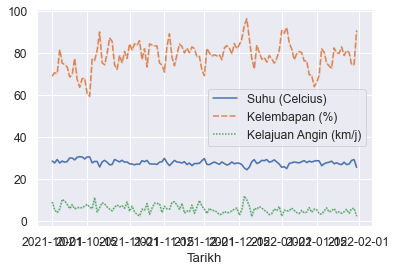

In [21]:
#Plot graph to see correlation between meteorological data 
sns.lineplot(data=data_covid.set_index('Tarikh')[['Suhu (Celcius)','Kelembapan (%)', 'Kelajuan Angin (km/j)']])

#### Correlation between each meteorological parameters and Covid-19 symptoms

In [22]:
# Create another table for correlation
covid_other = data_covid.groupby(['Tarikh','Suhu (Celcius)','Kelembapan (%)','Kelajuan Angin (km/j)'])[['1-demam','2-batuk',
                                  '3-selesema','4-asimptomatik','5-sakit tekak','6-hilang deria bau','7-hilang deria rasa',
                                  '8-sakit kepala','9-sakit badan','10-cirit-birit','11-pening','12-sesak nafas','13-muntah',
                                  '14-keletihan','15-sakit sendi','16-hidung tersumbat','17-sakit dada','18-berkahak',
                                  '19-hilang selera makan','20-menggigil','21-sakit perut','22-mual','23-sakit otot',
                                  '24-sakit mata','25-lain-lain']].count().reset_index()
covid_other

,Tarikh,Suhu (Celcius),Kelembapan (%),Kelajuan Angin (km/j),1-demam,2-batuk,3-selesema,4-asimptomatik,5-sakit tekak,6-hilang deria bau,7-hilang deria rasa,8-sakit kepala,9-sakit badan,10-cirit-birit,11-pening,12-sesak nafas,13-muntah,14-keletihan,15-sakit sendi,16-hidung tersumbat,17-sakit dada,18-berkahak,19-hilang selera makan,20-menggigil,21-sakit perut,22-mual,23-sakit otot,24-sakit mata,25-lain-lain
0,2021-10-01,28.429,69.000,8.857,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
1,2021-10-02,27.571,70.571,5.143,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
2,2021-10-03,29.167,70.167,3.833,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133
3,2021-10-04,27.500,81.667,5.667,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
4,2021-10-05,28.429,75.143,10.143,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2022-01-27,26.750,81.125,5.375,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230
119,2022-01-28,27.000,80.250,3.500,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
120,2022-01-29,28.714,74.286,5.714,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233
121,2022-01-30,29.143,74.571,5.857,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191


<AxesSubplot:xlabel='Suhu (Celcius)'>

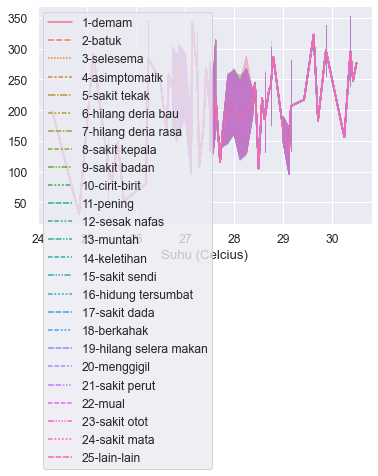

In [23]:
#Plot graph to see correlation between suhu and simptom 
suhu = sns.lineplot(data=covid_other.set_index('Suhu (Celcius)')[['1-demam','2-batuk','3-selesema','4-asimptomatik',
                                                                  '5-sakit tekak','6-hilang deria bau','7-hilang deria rasa',
                                                                  '8-sakit kepala','9-sakit badan','10-cirit-birit','11-pening',
                                                                  '12-sesak nafas','13-muntah','14-keletihan','15-sakit sendi',
                                                                  '16-hidung tersumbat','17-sakit dada','18-berkahak',
                                                                  '19-hilang selera makan','20-menggigil','21-sakit perut',
                                                                  '22-mual','23-sakit otot','24-sakit mata','25-lain-lain']])
suhu

<AxesSubplot:xlabel='Kelembapan (%)'>

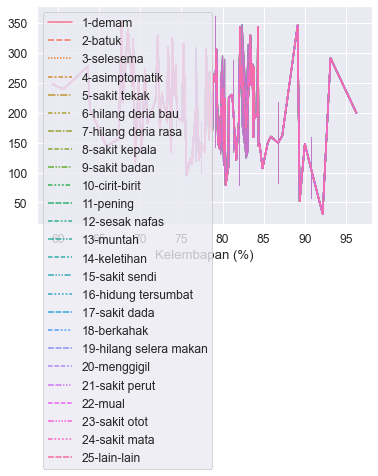

In [24]:
#Plot graph to see correlation between kelembapan and simptom 
kelembapan = sns.lineplot(data=covid_other.set_index('Kelembapan (%)')[['1-demam','2-batuk','3-selesema','4-asimptomatik',
                                                                  '5-sakit tekak','6-hilang deria bau','7-hilang deria rasa',
                                                                  '8-sakit kepala','9-sakit badan','10-cirit-birit','11-pening',
                                                                  '12-sesak nafas','13-muntah','14-keletihan','15-sakit sendi',
                                                                  '16-hidung tersumbat','17-sakit dada','18-berkahak',
                                                                  '19-hilang selera makan','20-menggigil','21-sakit perut',
                                                                  '22-mual','23-sakit otot','24-sakit mata','25-lain-lain']])
kelembapan

<AxesSubplot:xlabel='Kelajuan Angin (km/j)'>

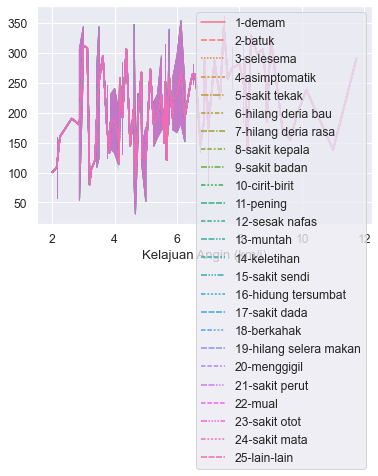

In [25]:
#Plot graph to see correlation between kelajuan angin and simptom 
angin = sns.lineplot(data=covid_other.set_index('Kelajuan Angin (km/j)')[['1-demam','2-batuk','3-selesema','4-asimptomatik',
                                                                  '5-sakit tekak','6-hilang deria bau','7-hilang deria rasa',
                                                                  '8-sakit kepala','9-sakit badan','10-cirit-birit','11-pening',
                                                                  '12-sesak nafas','13-muntah','14-keletihan','15-sakit sendi',
                                                                  '16-hidung tersumbat','17-sakit dada','18-berkahak',
                                                                  '19-hilang selera makan','20-menggigil','21-sakit perut',
                                                                  '22-mual','23-sakit otot','24-sakit mata','25-lain-lain']])
angin

#### Visualise whole data distribution

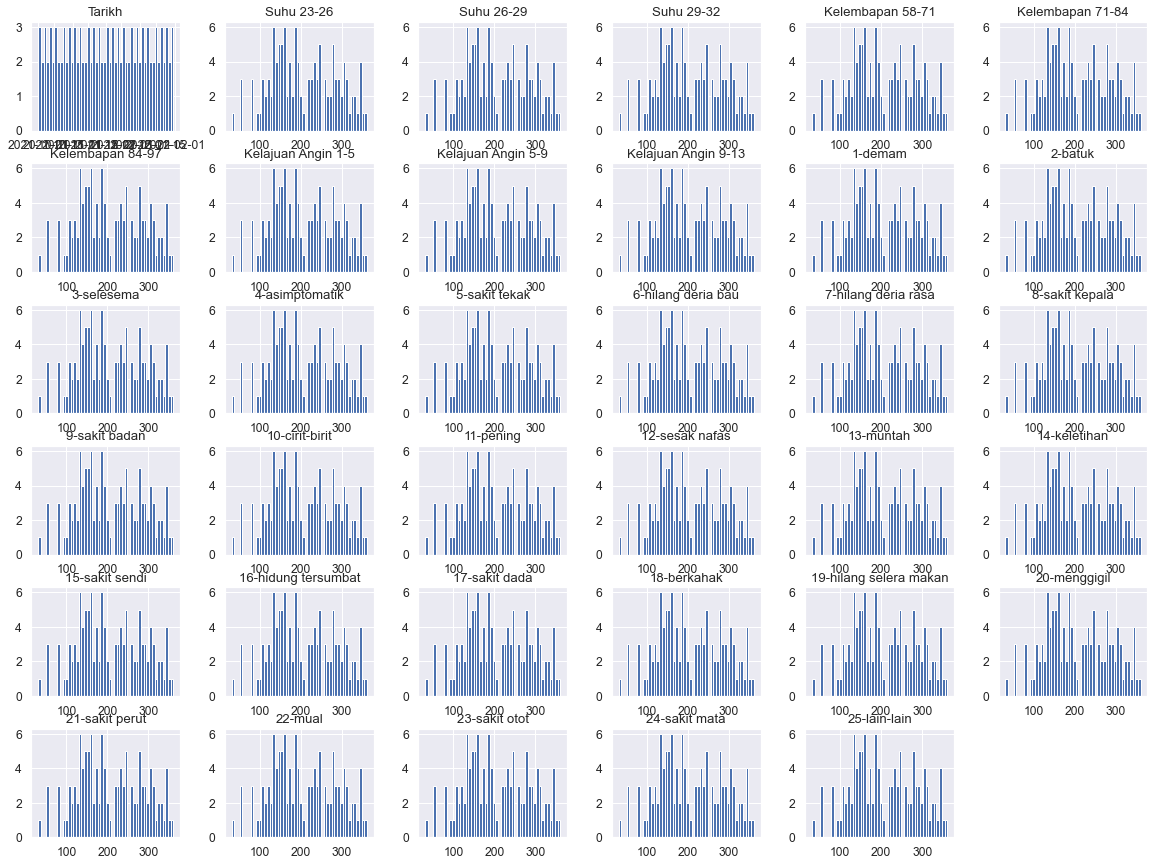

In [26]:
# To visualise the whole data distribution
%matplotlib inline
import matplotlib.pyplot as plt

covid_new.hist(bins=50, figsize=(20,15))
plt.show()

#### Correlation between meteorological parameters and each Covid-19 symptoms

<AxesSubplot:xlabel='3-selesema'>

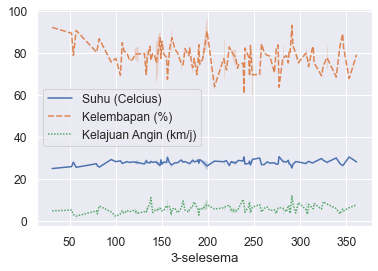

In [27]:
#Plot graph to see correlation between meteorological parameters and selesema
asimptomatik = sns.lineplot(data=covid_other.set_index('3-selesema')[['Suhu (Celcius)','Kelembapan (%)','Kelajuan Angin (km/j)']])
asimptomatik 

#### Correlation between variables in a graph (detailed)

<AxesSubplot:xlabel='Suhu (Celcius)', ylabel='3-selesema'>

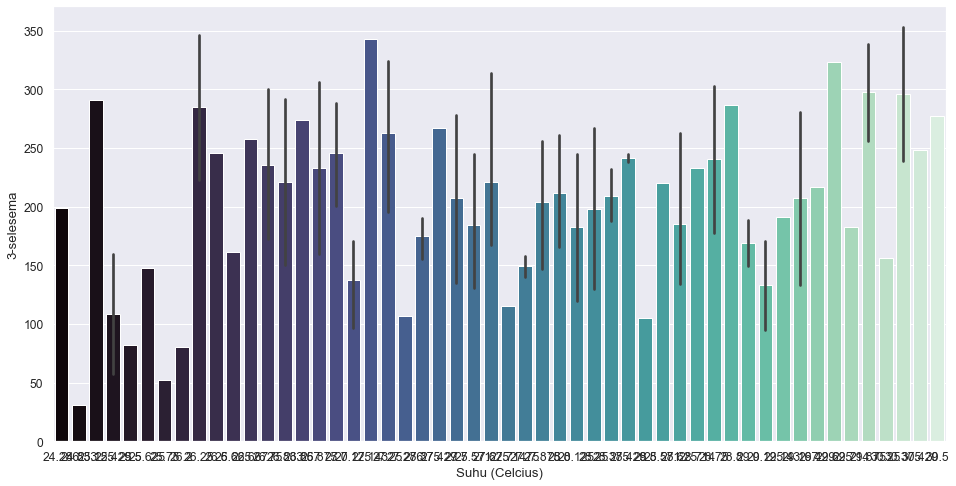

In [28]:
#Plot graph for temperature and selesema
plt.figure(figsize = (16, 8))
sns.barplot(data = covid_other, x = 'Suhu (Celcius)', y = '3-selesema', palette = 'mako')
#sns.barplot(data = covid_new, x = 'demam', y = 'Suhu (Celcius)', palette = 'mako')

<AxesSubplot:xlabel='Suhu (Celcius)', ylabel='1-demam'>

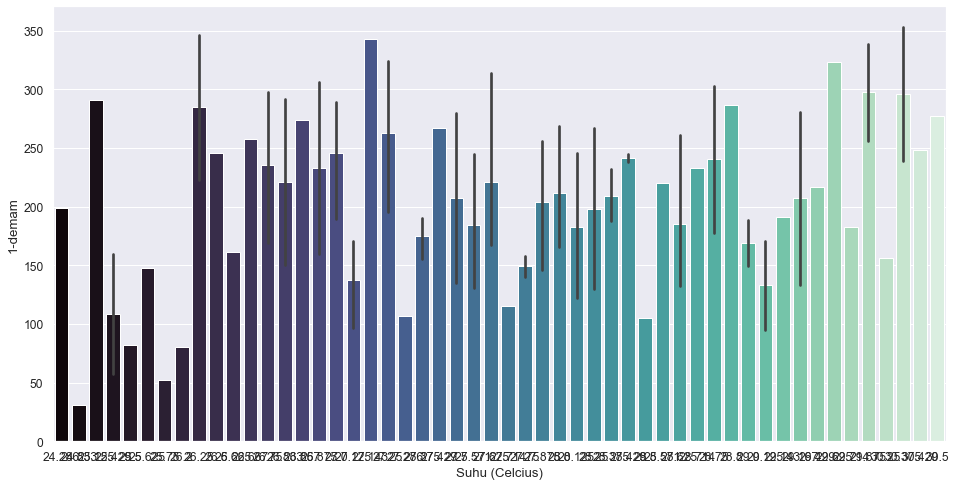

In [29]:
#Plot graph for temperature and demam
plt.figure(figsize = (16, 8))
sns.barplot(data = covid_other, x = 'Suhu (Celcius)', y = '1-demam', palette = 'mako')

<AxesSubplot:xlabel='Suhu (Celcius)', ylabel='2-batuk'>

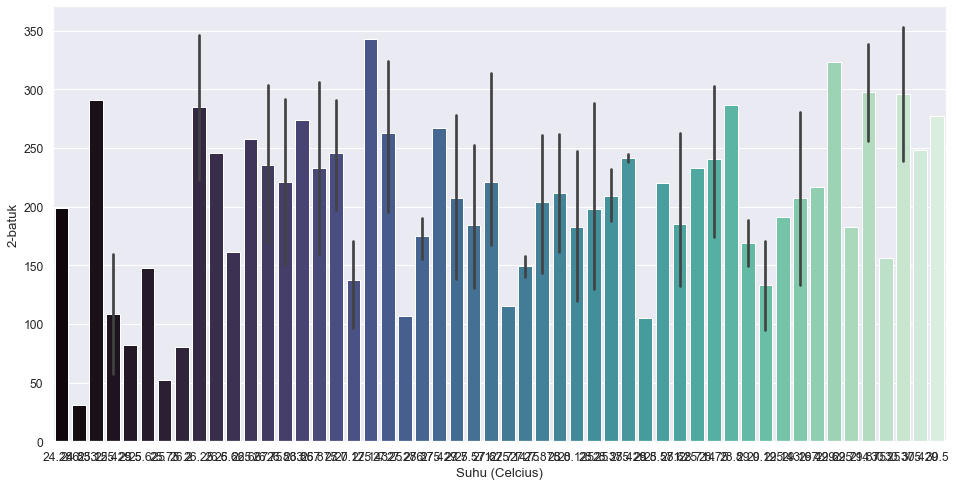

In [30]:
#Plot graph for temperature and batuk
plt.figure(figsize = (16, 8))
sns.barplot(data = covid_other, x = 'Suhu (Celcius)', y = '2-batuk', palette = 'mako')

### Association Rule Mining

#### Check data Meteorologi

In [31]:
# Upload data binari
arm = pd.read_excel('C:\\Users\\ainaa\\Desktop\\Integrated data for ARM.xlsx')
arm

,Suhu 23-26,Suhu 26-29,Suhu 29-32,Kelembapan 58-71,Kelembapan 71-84,Kelembapan 84-97,Kelajuan Angin 1-5,Kelajuan Angin 5-9,Kelajuan Angin 9-13,demam,batuk,selesema,asimptomatik,sakit tekak,hilang deria bau,hilang deria rasa,sakit kepala,sakit badan,cirit-birit,pening,sesak nafas,muntah,keletihan,sakit sendi,hidung tersumbat,sakit dada,berkahak,hilang selera makan,menggigil,sakit perut,mual,sakit otot,sakit mata,lain-lain
0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25451,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25452,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25453,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
arm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25455 entries, 0 to 25454
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Suhu 23-26           25455 non-null  int64
 1   Suhu 26-29           25455 non-null  int64
 2   Suhu 29-32           25455 non-null  int64
 3   Kelembapan 58-71     25455 non-null  int64
 4   Kelembapan 71-84     25455 non-null  int64
 5   Kelembapan 84-97     25455 non-null  int64
 6   Kelajuan Angin 1-5   25455 non-null  int64
 7   Kelajuan Angin 5-9   25455 non-null  int64
 8   Kelajuan Angin 9-13  25455 non-null  int64
 9   demam                25455 non-null  int64
 10  batuk                25455 non-null  int64
 11  selesema             25455 non-null  int64
 12  asimptomatik         25455 non-null  int64
 13  sakit tekak          25455 non-null  int64
 14  hilang deria bau     25455 non-null  int64
 15  hilang deria rasa    25455 non-null  int64
 16  sakit kepala         2

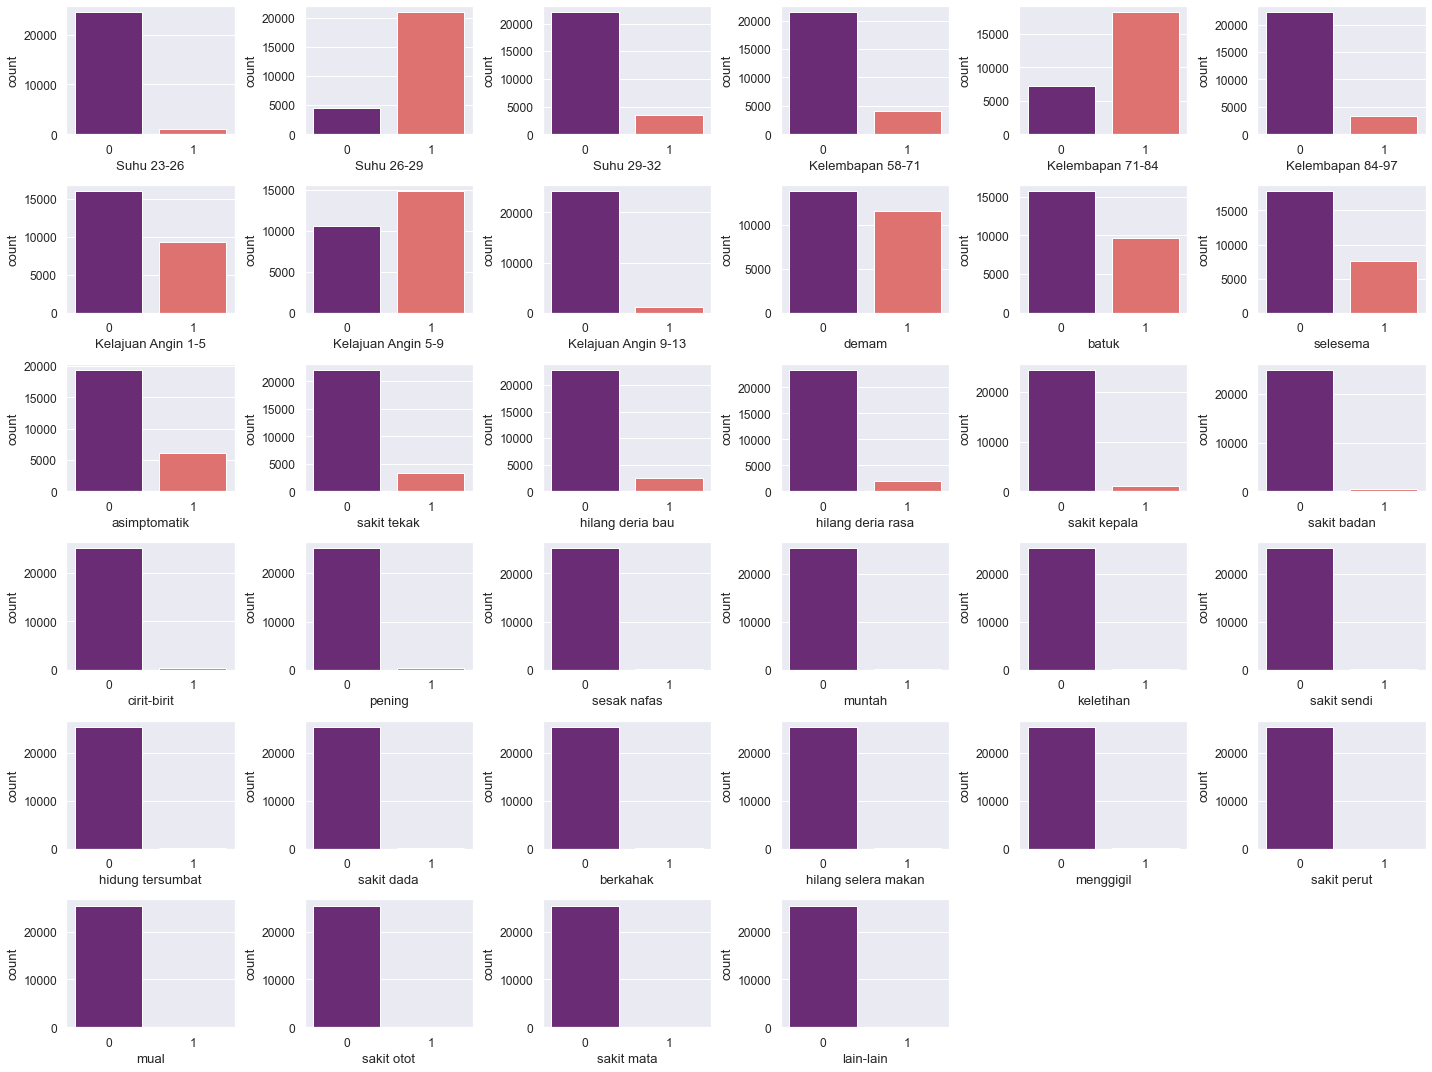

In [33]:
#Check data jap
plt.figure(figsize=(20,15))
cols = ['Suhu 23-26','Suhu 26-29','Suhu 29-32','Kelembapan 58-71','Kelembapan 71-84','Kelembapan 84-97',
        'Kelajuan Angin 1-5','Kelajuan Angin 5-9','Kelajuan Angin 9-13','demam','batuk','selesema',
        'asimptomatik','sakit tekak','hilang deria bau','hilang deria rasa','sakit kepala','sakit badan',
        'cirit-birit','pening','sesak nafas','muntah','keletihan','sakit sendi','hidung tersumbat','sakit dada',
        'berkahak','hilang selera makan','menggigil','sakit perut','mual','sakit otot','sakit mata','lain-lain']

for i in range (len(cols)):
    plt.subplot(6,6,i+1)
    sns.countplot(data=arm, x=cols[i], palette='magma')
plt.tight_layout()

In [34]:
#Count data suhu rendah
arm['Suhu 23-26'].value_counts()

0    24435
1     1020
Name: Suhu 23-26, dtype: int64

In [35]:
#Count data suhu sederhana
arm['Suhu 26-29'].value_counts()

1    20973
0     4482
Name: Suhu 26-29, dtype: int64

In [36]:
#Count data suhu tinggi
arm['Suhu 29-32'].value_counts()

0    21993
1     3462
Name: Suhu 29-32, dtype: int64

In [37]:
#Count data kelembapan rendah
arm['Kelembapan 58-71'].value_counts()

0    21437
1     4018
Name: Kelembapan 58-71, dtype: int64

In [38]:
#Count data kelembapan sederhana
arm['Kelembapan 71-84'].value_counts()

1    18184
0     7271
Name: Kelembapan 71-84, dtype: int64

In [39]:
#Count data kelembapan tinggi
arm['Kelembapan 84-97'].value_counts()

0    22202
1     3253
Name: Kelembapan 84-97, dtype: int64

In [40]:
#Count data kelajuan angin rendah
arm['Kelajuan Angin 1-5'].value_counts()

0    16058
1     9397
Name: Kelajuan Angin 1-5, dtype: int64

In [41]:
#Count data kelajuan angin sederhana
arm['Kelajuan Angin 5-9'].value_counts()

1    14864
0    10591
Name: Kelajuan Angin 5-9, dtype: int64

In [42]:
#Count data kelajuan angin tinggi
arm['Kelajuan Angin 9-13'].value_counts()

0    24261
1     1194
Name: Kelajuan Angin 9-13, dtype: int64

### Apriori Algorithm

In [43]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

#### Minimum Support = 0.4

In [44]:
aprioridata = apriori(arm,min_support=0.4,use_colnames=True)
aprioridata

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
1,0.714359,(Kelembapan 71-84)
2,0.583932,(Kelajuan Angin 5-9)
3,0.454685,(demam)
4,0.685366,"(Suhu 26-29, Kelembapan 71-84)"
5,0.447849,"(Suhu 26-29, Kelajuan Angin 5-9)"


In [45]:
rules = association_rules(aprioridata, metric = 'lift', min_threshold = 1)
rules.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Kelembapan 71-84),(Suhu 26-29),0.714359,0.823925,0.685366,0.959415,1.164445,0.096789,4.338422
0,(Suhu 26-29),(Kelembapan 71-84),0.823925,0.714359,0.685366,0.831831,1.164445,0.096789,1.698541


In [46]:
# Print the rules
for idx, row in rules.iterrows():
    antecedent = list(row['antecedents'])
    consequent = list(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    print(f"Rule #{idx+1}: {antecedent} -> {consequent}")
    print(f"Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}")
    print()

Rule #1: ['Suhu 26-29'] -> ['Kelembapan 71-84']
Support: 0.685, Confidence: 0.832, Lift: 1.164

Rule #2: ['Kelembapan 71-84'] -> ['Suhu 26-29']
Support: 0.685, Confidence: 0.959, Lift: 1.164



#### Minimum Support = 0.3

In [47]:
aprioridata = apriori(arm,min_support=0.3,use_colnames=True)
aprioridata

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
1,0.714359,(Kelembapan 71-84)
2,0.369161,(Kelajuan Angin 1-5)
3,0.583932,(Kelajuan Angin 5-9)
4,0.454685,(demam)
5,0.382007,(batuk)
6,0.685366,"(Suhu 26-29, Kelembapan 71-84)"
7,0.348419,"(Kelajuan Angin 1-5, Suhu 26-29)"
8,0.447849,"(Suhu 26-29, Kelajuan Angin 5-9)"
9,0.376154,"(Suhu 26-29, demam)"


In [48]:
rules = association_rules(aprioridata, metric = 'lift', min_threshold = 1)
rules.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Kelembapan 71-84),(Suhu 26-29),0.714359,0.823925,0.685366,0.959415,1.164445,0.096789,4.338422
11,"(demam, Kelembapan 71-84)",(Suhu 26-29),0.323198,0.823925,0.309448,0.957457,1.162069,0.043157,4.138779
2,(Kelajuan Angin 1-5),(Suhu 26-29),0.369161,0.823925,0.348419,0.943812,1.145508,0.044258,3.133676
7,"(Kelembapan 71-84, Kelajuan Angin 5-9)",(Suhu 26-29),0.389550,0.823925,0.364290,0.935155,1.135001,0.043330,2.715340
0,(Suhu 26-29),(Kelembapan 71-84),0.823925,0.714359,0.685366,0.831831,1.164445,0.096789,1.698541
5,(demam),(Suhu 26-29),0.454685,0.823925,0.376154,0.827285,1.004079,0.001528,1.019458
10,"(Suhu 26-29, demam)",(Kelembapan 71-84),0.376154,0.714359,0.309448,0.822663,1.151611,0.040739,1.610728
6,"(Suhu 26-29, Kelajuan Angin 5-9)",(Kelembapan 71-84),0.447849,0.714359,0.364290,0.813421,1.138673,0.044365,1.530941
9,(Kelembapan 71-84),"(Suhu 26-29, Kelajuan Angin 5-9)",0.714359,0.447849,0.364290,0.509954,1.138673,0.044365,1.126732
4,(Suhu 26-29),(demam),0.823925,0.454685,0.376154,0.456539,1.004079,0.001528,1.003413


In [49]:
# Print the rules
for idx, row in rules.iterrows():
    antecedent = list(row['antecedents'])
    consequent = list(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    print(f"Rule #{idx+1}: {antecedent} -> {consequent}")
    print(f"Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}")
    print()

Rule #1: ['Suhu 26-29'] -> ['Kelembapan 71-84']
Support: 0.685, Confidence: 0.832, Lift: 1.164

Rule #2: ['Kelembapan 71-84'] -> ['Suhu 26-29']
Support: 0.685, Confidence: 0.959, Lift: 1.164

Rule #3: ['Kelajuan Angin 1-5'] -> ['Suhu 26-29']
Support: 0.348, Confidence: 0.944, Lift: 1.146

Rule #4: ['Suhu 26-29'] -> ['Kelajuan Angin 1-5']
Support: 0.348, Confidence: 0.423, Lift: 1.146

Rule #5: ['Suhu 26-29'] -> ['demam']
Support: 0.376, Confidence: 0.457, Lift: 1.004

Rule #6: ['demam'] -> ['Suhu 26-29']
Support: 0.376, Confidence: 0.827, Lift: 1.004

Rule #7: ['Suhu 26-29', 'Kelajuan Angin 5-9'] -> ['Kelembapan 71-84']
Support: 0.364, Confidence: 0.813, Lift: 1.139

Rule #8: ['Kelembapan 71-84', 'Kelajuan Angin 5-9'] -> ['Suhu 26-29']
Support: 0.364, Confidence: 0.935, Lift: 1.135

Rule #9: ['Suhu 26-29'] -> ['Kelembapan 71-84', 'Kelajuan Angin 5-9']
Support: 0.364, Confidence: 0.442, Lift: 1.135

Rule #10: ['Kelembapan 71-84'] -> ['Suhu 26-29', 'Kelajuan Angin 5-9']
Support: 0.364, C

#### Minimum Support = 0.2

In [50]:
aprioridata = apriori(arm,min_support=0.2,use_colnames=True)
aprioridata

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
1,0.714359,(Kelembapan 71-84)
2,0.369161,(Kelajuan Angin 1-5)
3,0.583932,(Kelajuan Angin 5-9)
4,0.454685,(demam)
5,0.382007,(batuk)
6,0.299195,(selesema)
7,0.238696,(asimptomatik)
8,0.685366,"(Suhu 26-29, Kelembapan 71-84)"
9,0.348419,"(Kelajuan Angin 1-5, Suhu 26-29)"


In [51]:
rules = association_rules(aprioridata, metric = 'lift', min_threshold = 1)
rules.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,"(Kelajuan Angin 1-5, Kelembapan 71-84)",(Suhu 26-29),0.297152,0.823925,0.293420,0.987441,1.198460,0.048589,14.019311
33,"(selesema, Kelembapan 71-84)",(Suhu 26-29),0.211078,0.823925,0.202868,0.961102,1.166492,0.028955,4.526571
1,(Kelembapan 71-84),(Suhu 26-29),0.714359,0.823925,0.685366,0.959415,1.164445,0.096789,4.338422
25,"(demam, Kelembapan 71-84)",(Suhu 26-29),0.323198,0.823925,0.309448,0.957457,1.162069,0.043157,4.138779
29,"(Kelembapan 71-84, batuk)",(Suhu 26-29),0.272677,0.823925,0.260774,0.956346,1.160721,0.036108,4.033464
2,(Kelajuan Angin 1-5),(Suhu 26-29),0.369161,0.823925,0.348419,0.943812,1.145508,0.044258,3.133676
21,"(Kelembapan 71-84, Kelajuan Angin 5-9)",(Suhu 26-29),0.389550,0.823925,0.364290,0.935155,1.135001,0.043330,2.715340
14,"(Kelajuan Angin 1-5, Suhu 26-29)",(Kelembapan 71-84),0.348419,0.714359,0.293420,0.842147,1.178885,0.044524,1.809538
0,(Suhu 26-29),(Kelembapan 71-84),0.823925,0.714359,0.685366,0.831831,1.164445,0.096789,1.698541
28,"(Suhu 26-29, batuk)",(Kelembapan 71-84),0.313494,0.714359,0.260774,0.831830,1.164442,0.036826,1.698523


In [52]:
# Print the rules
for idx, row in rules.iterrows():
    antecedent = list(row['antecedents'])
    consequent = list(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    print(f"Rule #{idx+1}: {antecedent} -> {consequent}")
    print(f"Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}")
    print()

Rule #1: ['Suhu 26-29'] -> ['Kelembapan 71-84']
Support: 0.685, Confidence: 0.832, Lift: 1.164

Rule #2: ['Kelembapan 71-84'] -> ['Suhu 26-29']
Support: 0.685, Confidence: 0.959, Lift: 1.164

Rule #3: ['Kelajuan Angin 1-5'] -> ['Suhu 26-29']
Support: 0.348, Confidence: 0.944, Lift: 1.146

Rule #4: ['Suhu 26-29'] -> ['Kelajuan Angin 1-5']
Support: 0.348, Confidence: 0.423, Lift: 1.146

Rule #5: ['Suhu 26-29'] -> ['demam']
Support: 0.376, Confidence: 0.457, Lift: 1.004

Rule #6: ['demam'] -> ['Suhu 26-29']
Support: 0.376, Confidence: 0.827, Lift: 1.004

Rule #7: ['Kelajuan Angin 1-5'] -> ['Kelembapan 71-84']
Support: 0.297, Confidence: 0.805, Lift: 1.127

Rule #8: ['Kelembapan 71-84'] -> ['Kelajuan Angin 1-5']
Support: 0.297, Confidence: 0.416, Lift: 1.127

Rule #9: ['demam'] -> ['Kelajuan Angin 5-9']
Support: 0.266, Confidence: 0.586, Lift: 1.003

Rule #10: ['Kelajuan Angin 5-9'] -> ['demam']
Support: 0.266, Confidence: 0.456, Lift: 1.003

Rule #11: ['Kelajuan Angin 5-9'] -> ['batuk']
S

#### Minimum Support = 0.1

In [53]:
aprioridata = apriori(arm,min_support=0.1,use_colnames=True)
aprioridata

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
1,0.136005,(Suhu 29-32)
2,0.157847,(Kelembapan 58-71)
3,0.714359,(Kelembapan 71-84)
4,0.127794,(Kelembapan 84-97)
...,...,...
71,0.140483,"(Suhu 26-29, Kelembapan 71-84, Kelajuan Angin ..."
72,0.111019,"(selesema, Suhu 26-29, Kelembapan 71-84, Kelaj..."
73,0.146062,"(Suhu 26-29, demam, Kelembapan 71-84, batuk)"
74,0.112316,"(selesema, Suhu 26-29, demam, Kelembapan 71-84)"


In [54]:
rules = association_rules(aprioridata, metric = 'lift', min_threshold = 1)
rules.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,"(Kelajuan Angin 1-5, Kelembapan 71-84)",(Suhu 26-29),0.297152,0.823925,0.293420,0.987441,1.198460,0.048589,14.019311
139,"(Kelajuan Angin 1-5, demam, Kelembapan 71-84)",(Suhu 26-29),0.134983,0.823925,0.132940,0.984866,1.195335,0.021724,11.634522
151,"(Kelajuan Angin 1-5, Kelembapan 71-84, batuk)",(Suhu 26-29),0.111294,0.823925,0.109369,0.982704,1.192711,0.017671,10.180034
54,"(Kelembapan 71-84, asimptomatik)",(Suhu 26-29),0.169554,0.823925,0.163701,0.965477,1.171803,0.024001,5.100279
204,"(selesema, demam, Kelembapan 71-84)",(Suhu 26-29),0.116755,0.823925,0.112316,0.961978,1.167556,0.016118,4.630940
49,"(selesema, Kelembapan 71-84)",(Suhu 26-29),0.211078,0.823925,0.202868,0.961102,1.166492,0.028955,4.526571
216,"(selesema, Kelembapan 71-84, batuk)",(Suhu 26-29),0.130112,0.823925,0.124966,0.960447,1.165698,0.017763,4.451617
1,(Kelembapan 71-84),(Suhu 26-29),0.714359,0.823925,0.685366,0.959415,1.164445,0.096789,4.338422
41,"(demam, Kelembapan 71-84)",(Suhu 26-29),0.323198,0.823925,0.309448,0.957457,1.162069,0.043157,4.138779
45,"(Kelembapan 71-84, batuk)",(Suhu 26-29),0.272677,0.823925,0.260774,0.956346,1.160721,0.036108,4.033464


In [55]:
# Print the rules
for idx, row in rules.iterrows():
    antecedent = list(row['antecedents'])
    consequent = list(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    print(f"Rule #{idx+1}: {antecedent} -> {consequent}")
    print(f"Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}")
    print()

Rule #1: ['Suhu 26-29'] -> ['Kelembapan 71-84']
Support: 0.685, Confidence: 0.832, Lift: 1.164

Rule #2: ['Kelembapan 71-84'] -> ['Suhu 26-29']
Support: 0.685, Confidence: 0.959, Lift: 1.164

Rule #3: ['Kelajuan Angin 1-5'] -> ['Suhu 26-29']
Support: 0.348, Confidence: 0.944, Lift: 1.146

Rule #4: ['Suhu 26-29'] -> ['Kelajuan Angin 1-5']
Support: 0.348, Confidence: 0.423, Lift: 1.146

Rule #5: ['Suhu 26-29'] -> ['demam']
Support: 0.376, Confidence: 0.457, Lift: 1.004

Rule #6: ['demam'] -> ['Suhu 26-29']
Support: 0.376, Confidence: 0.827, Lift: 1.004

Rule #7: ['Suhu 26-29'] -> ['sakit tekak']
Support: 0.111, Confidence: 0.134, Lift: 1.022

Rule #8: ['sakit tekak'] -> ['Suhu 26-29']
Support: 0.111, Confidence: 0.842, Lift: 1.022

Rule #9: ['Suhu 29-32'] -> ['Kelembapan 58-71']
Support: 0.107, Confidence: 0.787, Lift: 4.985

Rule #10: ['Kelembapan 58-71'] -> ['Suhu 29-32']
Support: 0.107, Confidence: 0.678, Lift: 4.985

Rule #11: ['Suhu 29-32'] -> ['Kelajuan Angin 5-9']
Support: 0.127, 

### FP-Growth Algorithm

#### Minimum Support = 0.4

In [56]:
#fpgrowth(suhu_binari, min_support=0.1)

In [57]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(arm, min_support=0.4, use_colnames=True)

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
1,0.583932,(Kelajuan Angin 5-9)
2,0.454685,(demam)
3,0.714359,(Kelembapan 71-84)
4,0.447849,"(Suhu 26-29, Kelajuan Angin 5-9)"
5,0.685366,"(Suhu 26-29, Kelembapan 71-84)"


In [58]:
# Save data in excel format
fpgrowth(arm, min_support=0.4, use_colnames=True).to_excel('FP Growth Min 0.4.xlsx', index= False)

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Minimum Support = 0.3

In [59]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(arm, min_support=0.3, use_colnames=True)

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
1,0.583932,(Kelajuan Angin 5-9)
2,0.454685,(demam)
3,0.382007,(batuk)
4,0.369161,(Kelajuan Angin 1-5)
5,0.714359,(Kelembapan 71-84)
6,0.447849,"(Suhu 26-29, Kelajuan Angin 5-9)"
7,0.389550,"(Kelembapan 71-84, Kelajuan Angin 5-9)"
8,0.364290,"(Suhu 26-29, Kelembapan 71-84, Kelajuan Angin ..."
9,0.376154,"(Suhu 26-29, demam)"


In [60]:
# Save data in excel format
fpgrowth(arm, min_support=0.3, use_colnames=True).to_excel('FP Growth Min 0.3.xlsx', index= False)

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Minimum Support = 0.2

In [61]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(arm, min_support=0.2, use_colnames=True)

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
1,0.583932,(Kelajuan Angin 5-9)
2,0.454685,(demam)
3,0.382007,(batuk)
4,0.238696,(asimptomatik)
5,0.299195,(selesema)
6,0.369161,(Kelajuan Angin 1-5)
7,0.714359,(Kelembapan 71-84)
8,0.447849,"(Suhu 26-29, Kelajuan Angin 5-9)"
9,0.389550,"(Kelembapan 71-84, Kelajuan Angin 5-9)"


In [62]:
# Save data in excel format
fpgrowth(arm, min_support=0.2, use_colnames=True).to_excel('FP Growth Min 0.2.xlsx', index= False)

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Minimum Support = 0.1

In [63]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(arm, min_support=0.1, use_colnames=True)

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
1,0.583932,(Kelajuan Angin 5-9)
2,0.454685,(demam)
3,0.157847,(Kelembapan 58-71)
4,0.382007,(batuk)
...,...,...
71,0.293420,"(Kelajuan Angin 1-5, Suhu 26-29, Kelembapan 71..."
72,0.107012,"(Suhu 29-32, Kelembapan 58-71)"
73,0.127048,"(Suhu 29-32, Kelajuan Angin 5-9)"
74,0.101787,"(Suhu 29-32, Kelajuan Angin 5-9, Kelembapan 58..."


In [64]:
# Save data in excel format
fpgrowth(arm, min_support=0.1, use_colnames=True).to_excel('FP Growth Min 0.1.xlsx', index= False)

C:\Users\ainaa\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Counting Simptom

In [65]:
simptom = pd.read_excel('C:\\Users\\ainaa\\Desktop\\Data untuk Analisis Korelasi.xlsx')
simptom

,Tarikh,Suhu (Celcius),Range Suhu (Celcius),Suhu 23-26,Suhu 26-29,Suhu 29-32,Kelembapan (%),Range Kelembapan (%),Kelembapan 58-71,Kelembapan 71-84,Kelembapan 84-97,Kelajuan Angin (km/j),Range Kelajuan Angin (km/j),Kelajuan Angin 1-5,Kelajuan Angin 5-9,Kelajuan Angin 9-13,Bil,Nama Pesakit,No Pengenalan/No Dokumen Perjalanan Pesakit,Umur (Tahun),Kumpulan Umur (Tahun),Alamat semasa/kejadian,Mukim / Zon,Jantina,Warganegara,Keturunan,Status Pesakit,Lab Test Status Pertama,Kategori Gejala,Simptom,1-demam,2-batuk,3-selesema,4-asimptomatik,5-sakit tekak,6-hilang deria bau,7-hilang deria rasa,8-sakit kepala,9-sakit badan,10-cirit-birit,11-pening,12-sesak nafas,13-muntah,14-keletihan,15-sakit sendi,16-hidung tersumbat,17-sakit dada,18-berkahak,19-hilang selera makan,20-menggigil,21-sakit perut,22-mual,23-sakit otot,24-sakit mata,25-lain-lain,Catatan,Komorbiditi,satu,dua,tiga,empat,lima,enam
0,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,1,CHEONG KEE ANN,640425108291,57,50--59,"1, JALAN DAMAI PERDANA 9 /2J BANDAR DAMAI PERD...",Ampang,Lelaki,Warganegara,Cina,Hidup,Positif,CAT 2,demam,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,darah tinggi,darah tinggi,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,2,MD YUNUS BIN MD DOM,510502055301,70,70--79,"10 JALAN INANG 19/9 BANDAR MAHKOTA Cheras, BT ...",Cheras,Lelaki,Warganegara,Melayu,Hidup,Positif,CAT 2,batuk,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,"darah tinggi, kencing manis",darah tinggi,kencing manis,NaN,NaN,NaN,NaN
2,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,3,MOHAMAD FIRDAUS BIN SHUDIN,860326335645,35,30--39,"1-09, BLOK KENARI B, TAMAN IMPIAN EHSAN 43300 ...",Cheras,Lelaki,Warganegara,Melayu,Hidup,Positif,CAT 1,tiada,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,tiada,tiada,NaN,NaN,NaN,NaN,NaN
3,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,4,NUR ADELIA ALISHA BINTI MUHAMMAD RUSYDI,200826140808,1,0--4,"11, JALAN WATAN 19 TAMAN SRI WATAN Ampang",Ampang,Perempuan,Warganegara,Melayu,Hidup,Positif,CAT 2,demam,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,tiada,tiada,NaN,NaN,NaN,NaN,NaN
4,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.000,58--71,Ya,Tidak,Tidak,8.857,5--9,Tidak,Ya,Tidak,5,LOW CHON LIAN,630120107184,58,50--59,12 JALAN 5 TAMAN DAMAI JAYA BATU 9/12 Cheras 4...,Cheras,Perempuan,Warganegara,Cina,Hidup,Positif,CAT 2,"batuk, hilang deria bau",Tidak,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,tiada,tiada,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,2022-01-31,25.429,23--26,Ya,Tidak,Tidak,90.714,84--97,Tidak,Tidak,Ya,2.143,1--5,Ya,Tidak,Tidak,388,NOOR AZRIN BINTI MD ANUAR,840122145294,38,30--39,"""B-2-9 D’PINES CONDOMINIUM\n TAMAN NIRWANA\n A...",Ampang,Perempuan,Warganegara,Melayu,Hidup,Positif,CAT 1,tiada,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,NaN,tiada,tiada,NaN,NaN,NaN,NaN,NaN
25451,2022-01-31,25.429,23--26,Ya,Tidak,Tidak,90.714,84--97,Tidak,Tidak,Ya,2.143,1--5,Ya,Tidak,Tidak,390,ABDUL GUTHOOS BIN P.D ABDUL WAHAB,56

In [66]:
simptom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25455 entries, 0 to 25454
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Tarikh                                       25455 non-null  datetime64[ns]
 1   Suhu (Celcius)                               25455 non-null  float64       
 2   Range Suhu (Celcius)                         25455 non-null  object        
 3   Suhu 23-26                                   25455 non-null  object        
 4   Suhu 26-29                                   25455 non-null  object        
 5   Suhu 29-32                                   25455 non-null  object        
 6   Kelembapan (%)                               25455 non-null  float64       
 7   Range Kelembapan (%)                         25455 non-null  object        
 8   Kelembapan 58-71                             25455 non-null  object        


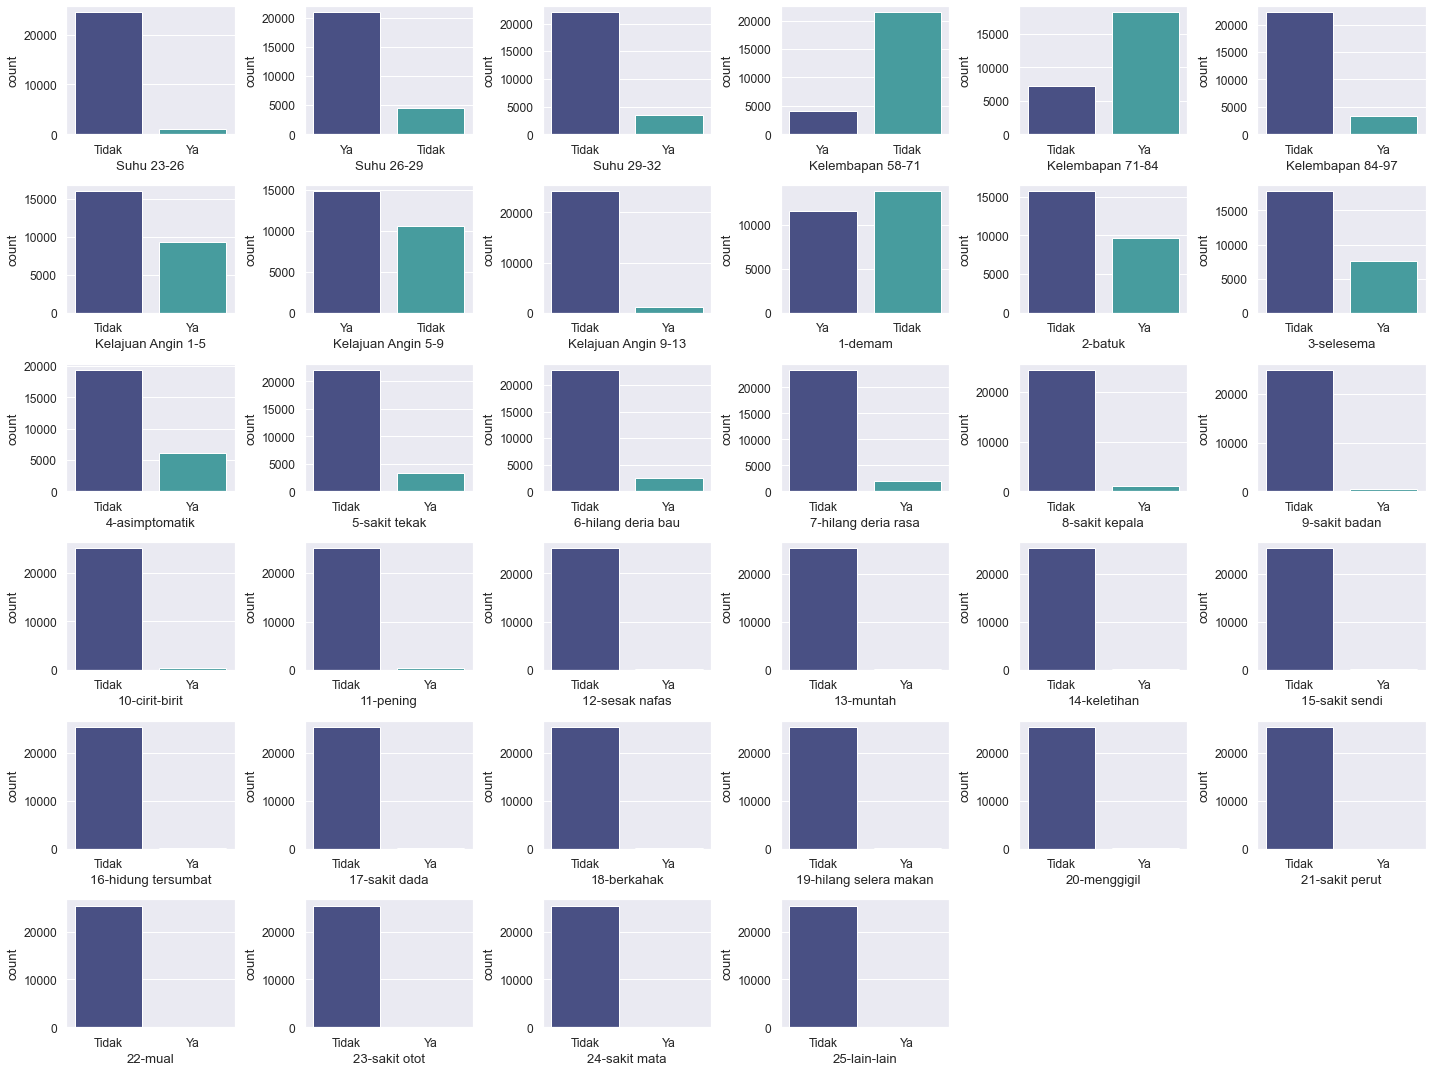

In [67]:
#Check data jap
plt.figure(figsize=(20,15))
cols = ['Suhu 23-26','Suhu 26-29','Suhu 29-32','Kelembapan 58-71','Kelembapan 71-84','Kelembapan 84-97',
        'Kelajuan Angin 1-5','Kelajuan Angin 5-9','Kelajuan Angin 9-13','1-demam','2-batuk','3-selesema','4-asimptomatik',
        '5-sakit tekak','6-hilang deria bau','7-hilang deria rasa','8-sakit kepala','9-sakit badan','10-cirit-birit',
        '11-pening','12-sesak nafas','13-muntah','14-keletihan','15-sakit sendi','16-hidung tersumbat','17-sakit dada',
        '18-berkahak','19-hilang selera makan','20-menggigil','21-sakit perut','22-mual','23-sakit otot','24-sakit mata',
        '25-lain-lain']

for i in range (len(cols)):
    plt.subplot(6,6,i+1)
    sns.countplot(data=simptom, x=cols[i], palette='mako')
plt.tight_layout()

In [68]:
#1 Demam
simptom['1-demam'].value_counts()

Tidak    13881
Ya       11574
Name: 1-demam, dtype: int64

In [69]:
#2 Batuk
simptom['2-batuk'].value_counts()

Tidak    15731
Ya        9724
Name: 2-batuk, dtype: int64

In [70]:
#3 Selesema
simptom['3-selesema'].value_counts()

Tidak    17839
Ya        7616
Name: 3-selesema, dtype: int64

In [71]:
#4 Asimptomatik
simptom['4-asimptomatik'].value_counts()

Tidak    19379
Ya        6076
Name: 4-asimptomatik, dtype: int64

In [72]:
#5 Sakit tekak
simptom['5-sakit tekak'].value_counts()

Tidak    22110
Ya        3345
Name: 5-sakit tekak, dtype: int64

In [73]:
#6 Hilang deria bau
simptom['6-hilang deria bau'].value_counts()

Tidak    22853
Ya        2602
Name: 6-hilang deria bau, dtype: int64

In [74]:
#7 Hilang deria rasa
simptom['7-hilang deria rasa'].value_counts()

Tidak    23409
Ya        2046
Name: 7-hilang deria rasa, dtype: int64

In [75]:
#8 Sakit kepala
simptom['8-sakit kepala'].value_counts()

Tidak    24437
Ya        1018
Name: 8-sakit kepala, dtype: int64

In [76]:
#9 Sakit badan
simptom['9-sakit badan'].value_counts()

Tidak    24870
Ya         585
Name: 9-sakit badan, dtype: int64

In [77]:
#10 Cirit-birit
simptom['10-cirit-birit'].value_counts()

Tidak    25015
Ya         440
Name: 10-cirit-birit, dtype: int64

In [78]:
#11 Pening
simptom['11-pening'].value_counts()

Tidak    25115
Ya         340
Name: 11-pening, dtype: int64

In [79]:
#12 Sesak nafas
simptom['12-sesak nafas'].value_counts()

Tidak    25198
Ya         257
Name: 12-sesak nafas, dtype: int64

In [80]:
#13 Muntah
simptom['13-muntah'].value_counts()

Tidak    25236
Ya         219
Name: 13-muntah, dtype: int64

In [81]:
#14 Keletihan
simptom['14-keletihan'].value_counts()

Tidak    25280
Ya         175
Name: 14-keletihan, dtype: int64

In [82]:
#15 Sakit sendi
simptom['15-sakit sendi'].value_counts()

Tidak    25297
Ya         158
Name: 15-sakit sendi, dtype: int64

In [83]:
#16 Hidung tersumbat
simptom['16-hidung tersumbat'].value_counts()

Tidak    25336
Ya         119
Name: 16-hidung tersumbat, dtype: int64

In [84]:
#17 Sakit dada
simptom['17-sakit dada'].value_counts()

Tidak    25338
Ya         117
Name: 17-sakit dada, dtype: int64

In [85]:
#18 Berkahak
simptom['18-berkahak'].value_counts()

Tidak    25402
Ya          53
Name: 18-berkahak, dtype: int64

In [86]:
#19 Hilang selera makan
simptom['19-hilang selera makan'].value_counts()

Tidak    25407
Ya          48
Name: 19-hilang selera makan, dtype: int64

In [87]:
#20 Menggigil
simptom['20-menggigil'].value_counts()

Tidak    25409
Ya          46
Name: 20-menggigil, dtype: int64

In [88]:
#21 Sakit perut
simptom['21-sakit perut'].value_counts()

Tidak    25432
Ya          23
Name: 21-sakit perut, dtype: int64

In [89]:
#22 Mual
simptom['22-mual'].value_counts()

Tidak    25435
Ya          20
Name: 22-mual, dtype: int64

In [90]:
#23 Sakit otot
simptom['23-sakit otot'].value_counts()

Tidak    25436
Ya          19
Name: 23-sakit otot, dtype: int64

In [91]:
#24 Sakit mata
simptom['24-sakit mata'].value_counts()

Tidak    25439
Ya          16
Name: 24-sakit mata, dtype: int64

In [92]:
#25 Lain-lain
simptom['25-lain-lain'].value_counts()

Tidak    25417
Ya          38
Name: 25-lain-lain, dtype: int64

In [93]:
# Check data suhu
simptom['Range Suhu (Celcius)'].value_counts()

26--29    20973
29--32     3462
23--26     1020
Name: Range Suhu (Celcius), dtype: int64

In [94]:
# Check data kelembapan
simptom['Range Kelembapan (%)'].value_counts()

71--84    18184
58--71     4018
84--97     3253
Name: Range Kelembapan (%), dtype: int64

In [95]:
# Check data kelajuan angin
simptom['Range Kelajuan Angin (km/j)'].value_counts()

5--9     14864
1--5      9397
9--13     1194
Name: Range Kelajuan Angin (km/j), dtype: int64